In [42]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

path = 'data/'

In [2]:
def read_file(path, file_name):
    df = pd.read_csv(path + file_name)
    print('df {}: {}'.format(file_name, df.shape))
    return df

In [3]:
df_m = read_file(path, 'df_merge_cc.csv')
df_m.head(2)

df df_merge_cc.csv: (2886875, 6)


,h,t,r,h_id,t_id,r_id
0,P41932,GO:0045167,hasBiologicalProcess,105518,157161,6
1,P41932,GO:0000132,hasBiologicalProcess,105518,103330,6


In [4]:
df_interact = df_m[df_m['r'] == 'interact']
print('df_interact: {}'.format(df_interact.shape))

df_interact: (1251270, 6)


In [5]:
set_h = set(df_interact['h'].unique())
set_t = set(df_interact['t'].unique())
set_h == set_t

True

In [6]:
df_int_grp = df_interact.groupby('h')['t'].count().reset_index(name = 'count')
print('df_int_grp: {}'.format(df_int_grp.shape))
df_int_grp.head(3)

df_int_grp: (19303, 2)


,h,count
0,A0A024BTL2,55
1,A0A024R161,17
2,A0A024R6J8,2


In [8]:
df_not_interact = df_m[~df_m['r'].isin(['interact'])]
print('df_not_interact: {}'.format(df_not_interact.shape))
df_not_interact.head(2)

df_not_interact: (1635605, 6)


,h,t,r,h_id,t_id,r_id
0,P41932,GO:0045167,hasBiologicalProcess,105518,157161,6
1,P41932,GO:0000132,hasBiologicalProcess,105518,103330,6


In [11]:
df_no_int_grp = df_not_interact.groupby('h')['t'].count().reset_index(name = 'count')
print('df_no_int_grp: {}'.format(df_no_int_grp.shape))
df_no_int_grp.head(2)

df_no_int_grp: (177655, 2)


,h,count
0,A0A023GPK8,7
1,A0A023GRW3,4


In [34]:
d = dict()

for i in tqdm(set_h):
    c = df_int_grp.loc[df_int_grp['h'] == i, 'count'].values[0]
    c_no = 0
    s_no = df_no_int_grp.loc[df_no_int_grp['h'] == i, 'count']
    if s_no.shape[0] > 0:
        c_no = s_no.values[0]
    
    if s_no.shape[0] > 1:
        Print('Error {}'.format(i))
        
    d[i] = (c, c_no)



100%|██████████| 19303/19303 [04:07<00:00, 77.86it/s]


In [40]:
d

{'Q7Z4L5': (12, 12),
 'Q6TGC4': (2, 11),
 'Q9UHD4': (6, 6),
 'Q9UQQ1': (10, 5),
 'Q9Z1W9': (94, 44),
 'Q96KS9': (3, 1),
 'P54936': (42, 18),
 'Q99988': (137, 16),
 'Q96ST3': (87, 53),
 'P15170': (36, 11),
 'Q86TM3': (46, 3),
 'Q6BDS2': (2, 1),
 'O60861': (151, 4),
 'O95625': (23, 4),
 'E2QTT7': (217, 7),
 'Q13686': (1, 29),
 'Q9NTC3': (16, 2),
 'Q7Z4N4': (12, 8),
 'Q9BVC6': (1, 8),
 'P36021': (7, 9),
 'Q86WG0': (33, 15),
 'D4A5E7': (163, 17),
 'Q9NXH2': (5, 1),
 'P42566': (133, 34),
 'Q02577': (2, 4),
 'Q9Y2H6': (10, 1),
 'E1B887': (41, 7),
 'Q8N3Y1': (52, 9),
 'P08684': (31, 38),
 'E1BE66': (214, 28),
 'A6NHC0': (50, 4),
 'P78357': (8, 19),
 'Q86VZ5': (14, 11),
 'Q16363': (25, 6),
 'Q13671': (26, 4),
 'Q8K1R7': (85, 2),
 'Q9ULK0': (26, 12),
 'P24864': (180, 23),
 'Q9H175': (4, 1),
 'Q6PK81': (11, 2),
 'Q99680': (8, 1),
 'P43353': (8, 18),
 'Q9BXX2': (64, 2),
 'P35579': (128, 60),
 'P00167': (17, 8),
 'Q5VZP5': (132, 2),
 'Q9Y230': (49, 45),
 'Q96I24': (7, 1),
 'Q9H2A2': (5, 20),
 'Q9Y

PPI:        min: 1, max: 4782
Other links min: 0, max: 266


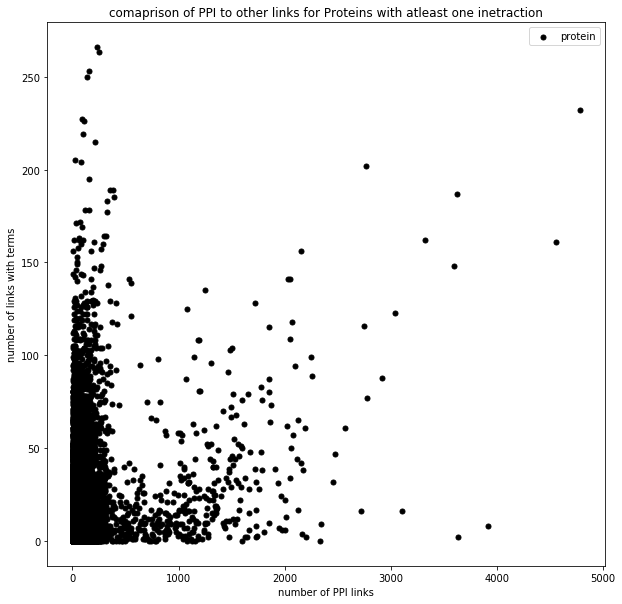

In [62]:
x,y = zip(*d.values())
print('PPI:        min: {}, max: {}'.format(min(x), max(x)))
print('Other links min: {}, max: {}'.format(min(y), max(y)))
fig = plt.figure(figsize =(10,10))

plt.scatter(x,y, label='protein', color='k', s=25, marker="o")

plt.xlabel('number of PPI links')
plt.ylabel('number of links with terms')
plt.title('comaprison of PPI to other links for Proteins with atleast one inetraction')
plt.legend()
plt.show()

In [63]:
lst_x = list(x)
lst_x.sort(reverse=True)
a = lst_x[:5]
df_int_grp[df_int_grp['count'].isin(a)]

,h,count
4993,P12931,3624
5937,P31749,4782
7147,P57078,3632
7884,Q05823,3918
9863,Q5S007,4562


In [64]:
a

[4782, 4562, 3918, 3632, 3624]

In [ ]:
P31749: AKT1, RAC-alpha serine/threonine-protein kinase (4782)
Q5S007: LRRK2 , Leucine-rich repeat serine/threonine-protein kinase 2(4562)    
Q05823: RNASEL, 2-5A-dependent ribonuclease (3918)
P57078: RIPK4, Receptor-interacting serine/threonine-protein kinase 4 (3632)
P12931: SRC, Proto-oncogene tyrosine-protein kinase Src (3624)